In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def range_query(self, data, point, eps):
        neighbors = []
        for i in range(len(data)):
            if self.euclidean_distance(data[i], point) <= eps:
                neighbors.append(i)
        return neighbors

    def dbscan(self, data):
        labels = [0] * len(data)
        cluster_id = 0
        for i in range(len(data)):
            if labels[i] != 0:
                continue
            neighbors = self.range_query(data, data[i], self.eps)
            if len(neighbors) < self.min_samples:
                labels[i] = -1  # Noise point
            else:
                cluster_id += 1
                self.expand_cluster(data, labels, i, neighbors, cluster_id, self.eps, self.min_samples)
        return labels

    def expand_cluster(self, data, labels, point, neighbors, cluster_id, eps, min_samples):
        labels[point] = cluster_id
        i = 0
        while i < len(neighbors):
            p = neighbors[i]
            if labels[p] == -1:
                labels[p] = cluster_id
            elif labels[p] == 0:
                labels[p] = cluster_id
                new_neighbors = self.range_query(data, data[p], self.eps)
                if len(new_neighbors) >= self.min_samples:
                    neighbors = neighbors + new_neighbors
            i += 1

In [8]:
# Example usage
compound  = pd.read_csv('./Q_6/Compound.txt', sep='\t')
d31 = pd.read_csv('./Q_6/D31.txt', sep='\t')
pathbased = pd.read_csv('./Q_6/pathbased.txt', sep='\t')
spiral = pd.read_csv('./Q_6/spiral.txt', sep='\t')

In [9]:
compound = StandardScaler().fit_transform(compound)
d31 = StandardScaler().fit_transform(d31)
pathbased = StandardScaler().fit_transform(pathbased)
spiral = StandardScaler().fit_transform(spiral)

In [26]:
dbscan_obj = DBSCAN(eps=0.5, min_samples=2)

In [27]:
c_labels = dbscan_obj.dbscan(compound)

In [28]:
d_labels = dbscan_obj.dbscan(d31)

In [29]:
p_labels = dbscan_obj.dbscan(pathbased)

In [30]:
s_labels = dbscan_obj.dbscan(spiral)

In [31]:
import matplotlib.pyplot as plt

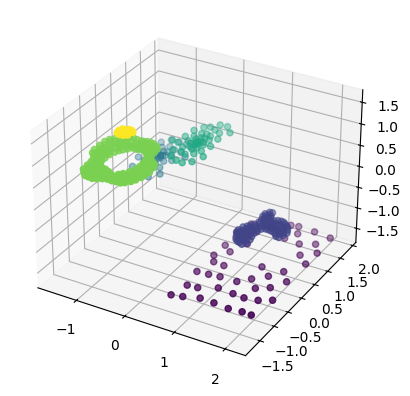

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(compound[:,0],compound[:,1],compound[:,2], c=c_labels, marker='o')

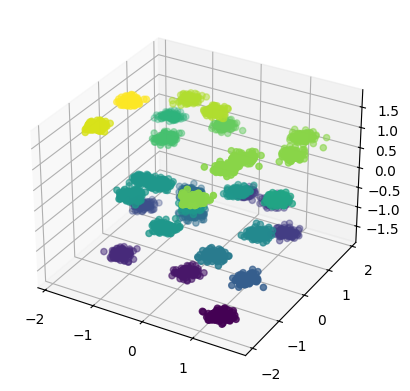

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d31[:,0],d31[:,1],d31[:,2], c=d_labels, marker='o')

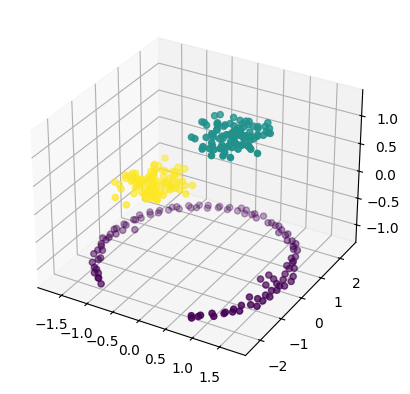

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pathbased[:,0],pathbased[:,1],pathbased[:,2], c=p_labels, marker='o')

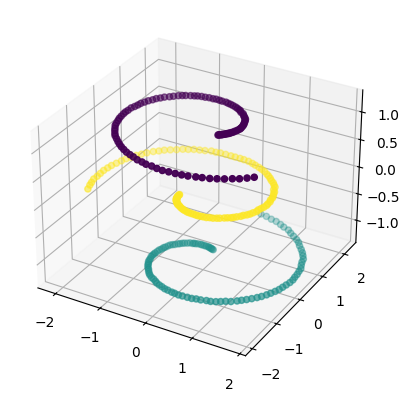

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(spiral[:,0],spiral[:,1],spiral[:,2], c=s_labels, marker='o')